Here’s a brief description of all the features which I’m referring from data source itself for you to follow along.

1: Pregnancies: Number of times pregnant

2: Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

3: BloodPressure: Diastolic blood pressure (mm Hg)

4: SkinThickness: Triceps skin fold thickness (mm)

5: Insulin: 2-Hour serum insulin (mu U/ml)

6: BMI: Body mass index (weight in kg/(height in m)²)

7: DiabetesPedigreeFunction: Diabetes pedigree function

8: Age: Age (years)

9: Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [ ]:
#importing reqd libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


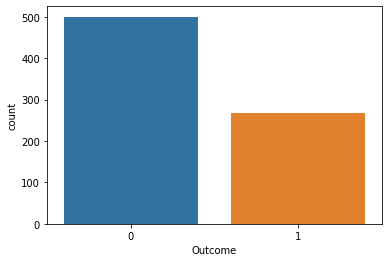

In [ ]:
ax = sns.countplot(x="Outcome", data=df)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


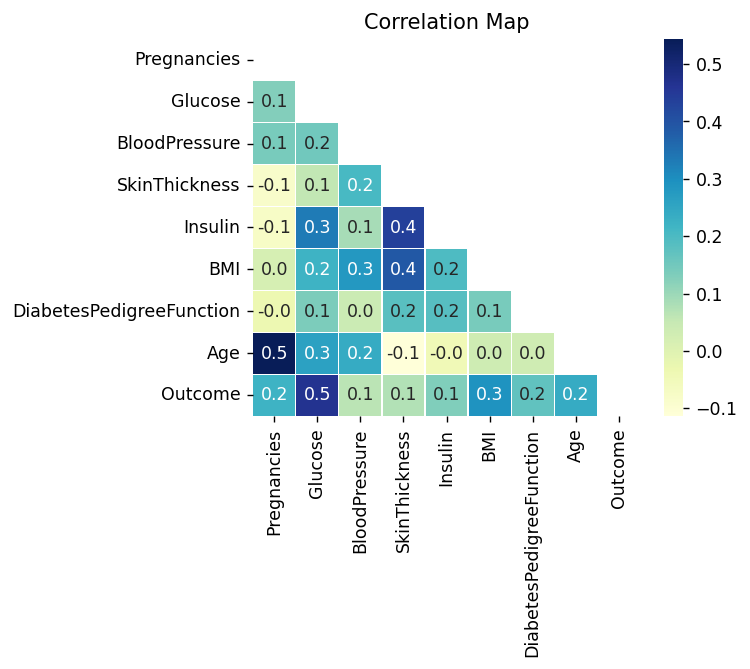

In [ ]:
#correlation map without any preprocessing

plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

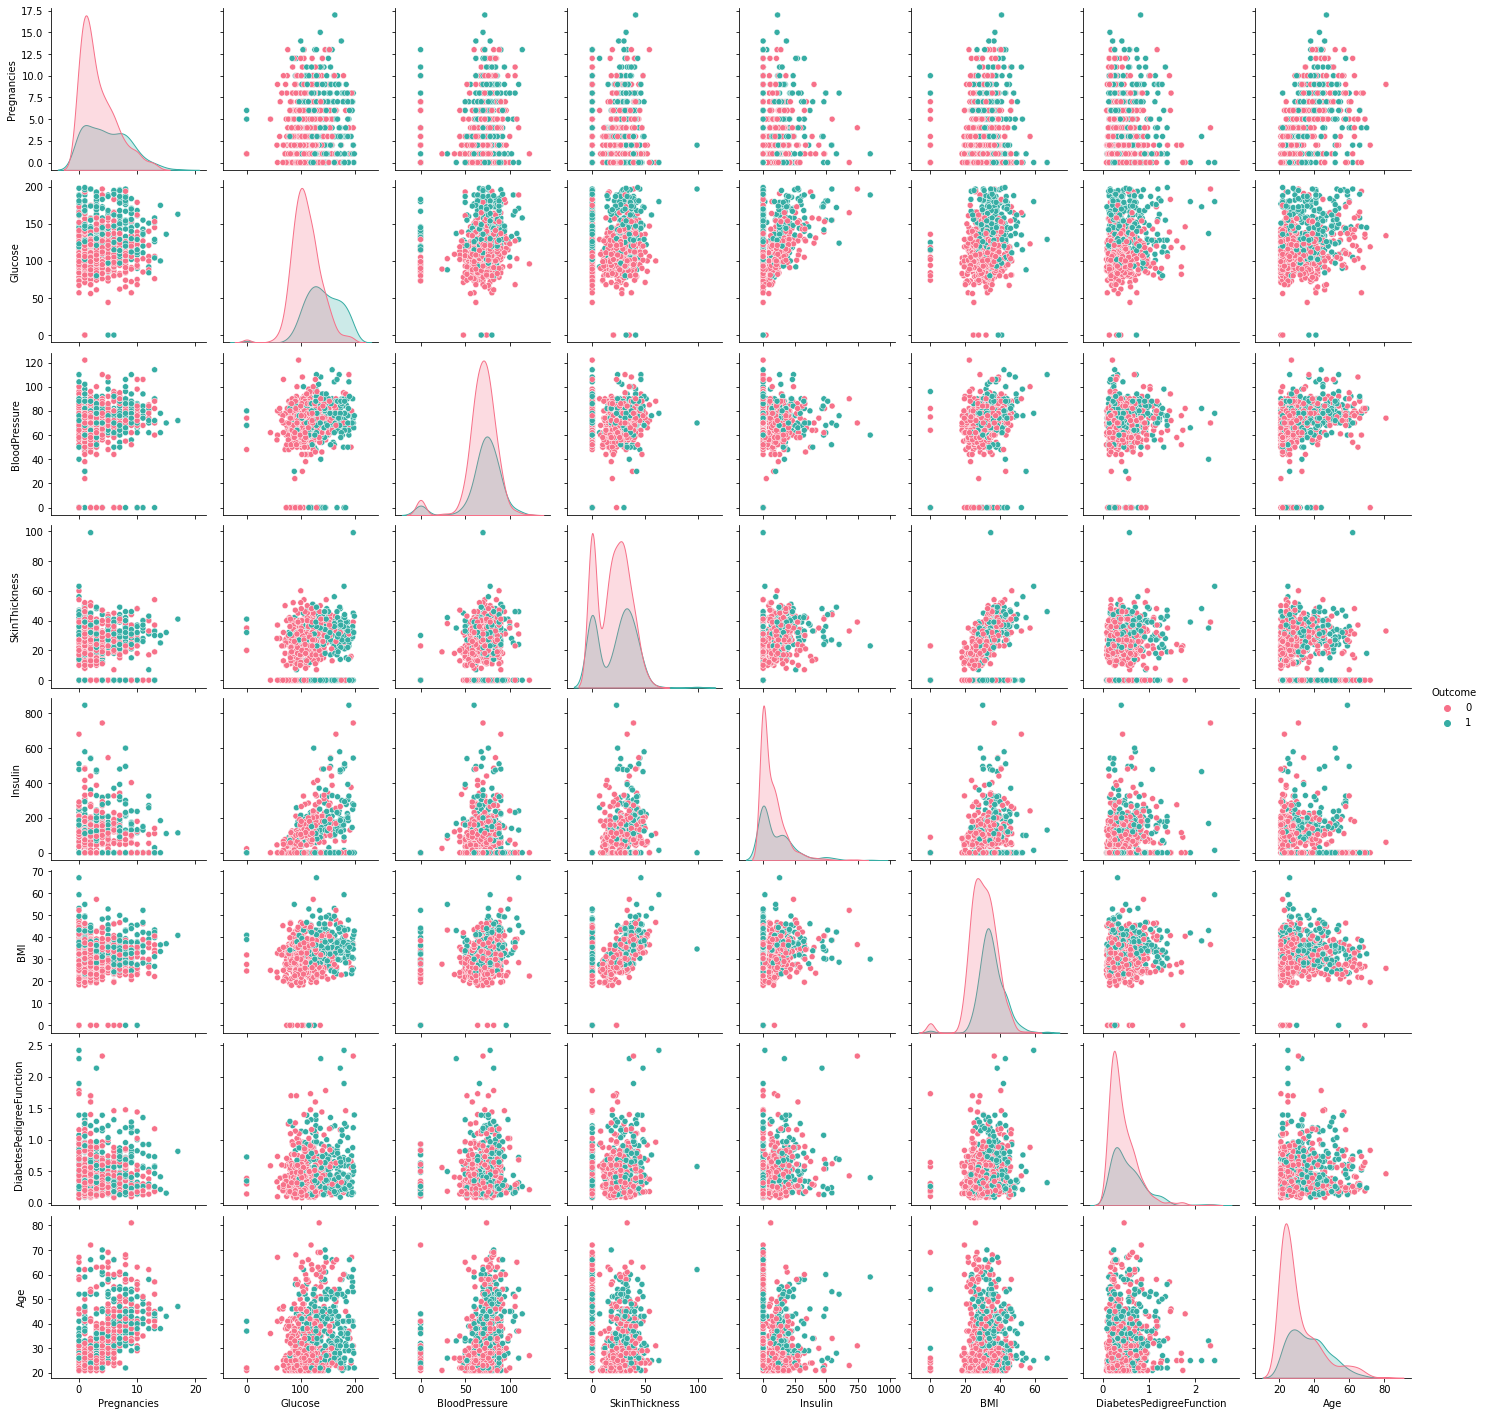

In [ ]:
sns.pairplot(df, hue="Outcome", palette="husl")

In [ ]:
print('Total zero Glucose values: ' + str(df[df['Glucose']==0].shape[0]))
print('Total zero BloodPressure values: ' + str(df[df['BloodPressure']==0].shape[0]))
print('Total zero SkinThickness values: ' + str(df[df['SkinThickness']==0].shape[0]))
print('Total zero Insulin values: ' + str(df[df['Insulin']==0].shape[0]))
print('Total zero BMI values: ' + str(df[df['BMI']==0].shape[0]))
print('Total zero DiabetesPedigreeFunction values: ' + str(df[df['DiabetesPedigreeFunction']==0].shape[0]))
print('Total zero Age values: ' + str(df[df['Age']==0].shape[0]))

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [ ]:
df[df['Glucose']==0]['Outcome'].value_counts()

0    3
1    2
Name: Outcome, dtype: int64

In [ ]:

df[df['BloodPressure']==0]['Outcome'].value_counts()

0    19
1    16
Name: Outcome, dtype: int64

In [ ]:
df[df['SkinThickness']==0]['Outcome'].value_counts()

0    139
1     88
Name: Outcome, dtype: int64

In [ ]:
df[df['Insulin']==0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [ ]:

df[df['BMI']==0]['Outcome'].value_counts()

0    9
1    2
Name: Outcome, dtype: int64

In [ ]:
def replace_zero(df):
    df_nan = df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan

df_nan=replace_zero(df)

In [ ]:
df_nan.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


In [ ]:

df_nan[df_nan['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [ ]:
#finds the median of different attribute based on Outcome
def find_median(df, col):
    
    df_nondiab = df[df['Outcome']==0].reset_index(drop = True)
    df_diab = df[df['Outcome']==1].reset_index(drop = True)
    return(df_nondiab[col].median(), df_diab[col].median())

In [ ]:

find_median(df_nan,'Glucose')

(107.0, 140.0)

In [ ]:
df_nan.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
def replace_null(df,var):
    
    median_tuple=find_median(df,var)
    var_0 = median_tuple[0]
    var_1 = median_tuple[1]
    
    df.loc[(df['Outcome'] == 0) & (df[var].isnull()), var] = var_0
    df.loc[(df['Outcome'] == 1) & (df[var].isnull()), var] = var_1
        
    return df[var].isnull().sum()

In [ ]:

replace_null(df_nan, 'Glucose' )

0

In [ ]:
replace_null(df_nan, 'BloodPressure' )

0

In [ ]:
replace_null(df_nan, 'SkinThickness' )

0

In [ ]:
replace_null(df_nan, 'Insulin' )

0

In [ ]:

replace_null(df_nan, 'BMI' )

0

In [ ]:
df_nan.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

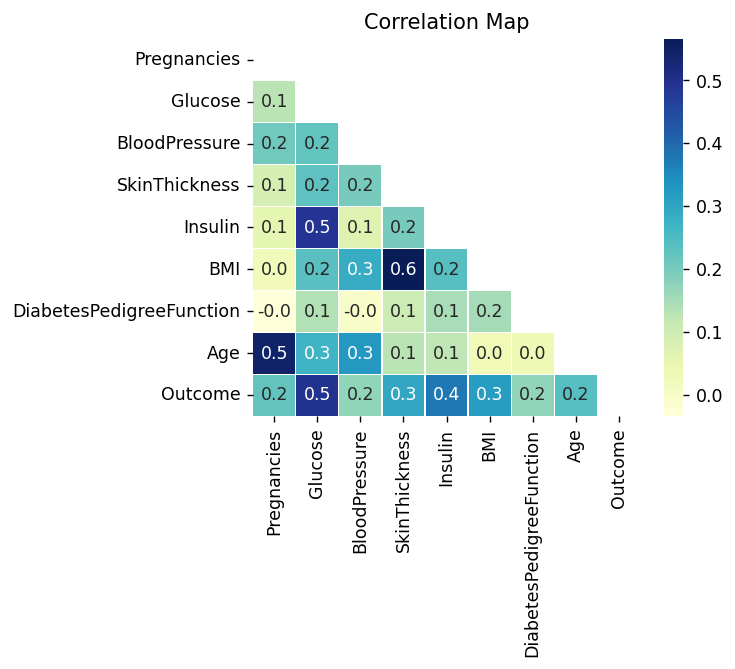

In [ ]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df_nan.corr())
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

In [ ]:
df_nan.shape

(768, 9)

In [ ]:
df = df_nan.copy()

In [ ]:
column_list = list(df.columns)

In [ ]:
column_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


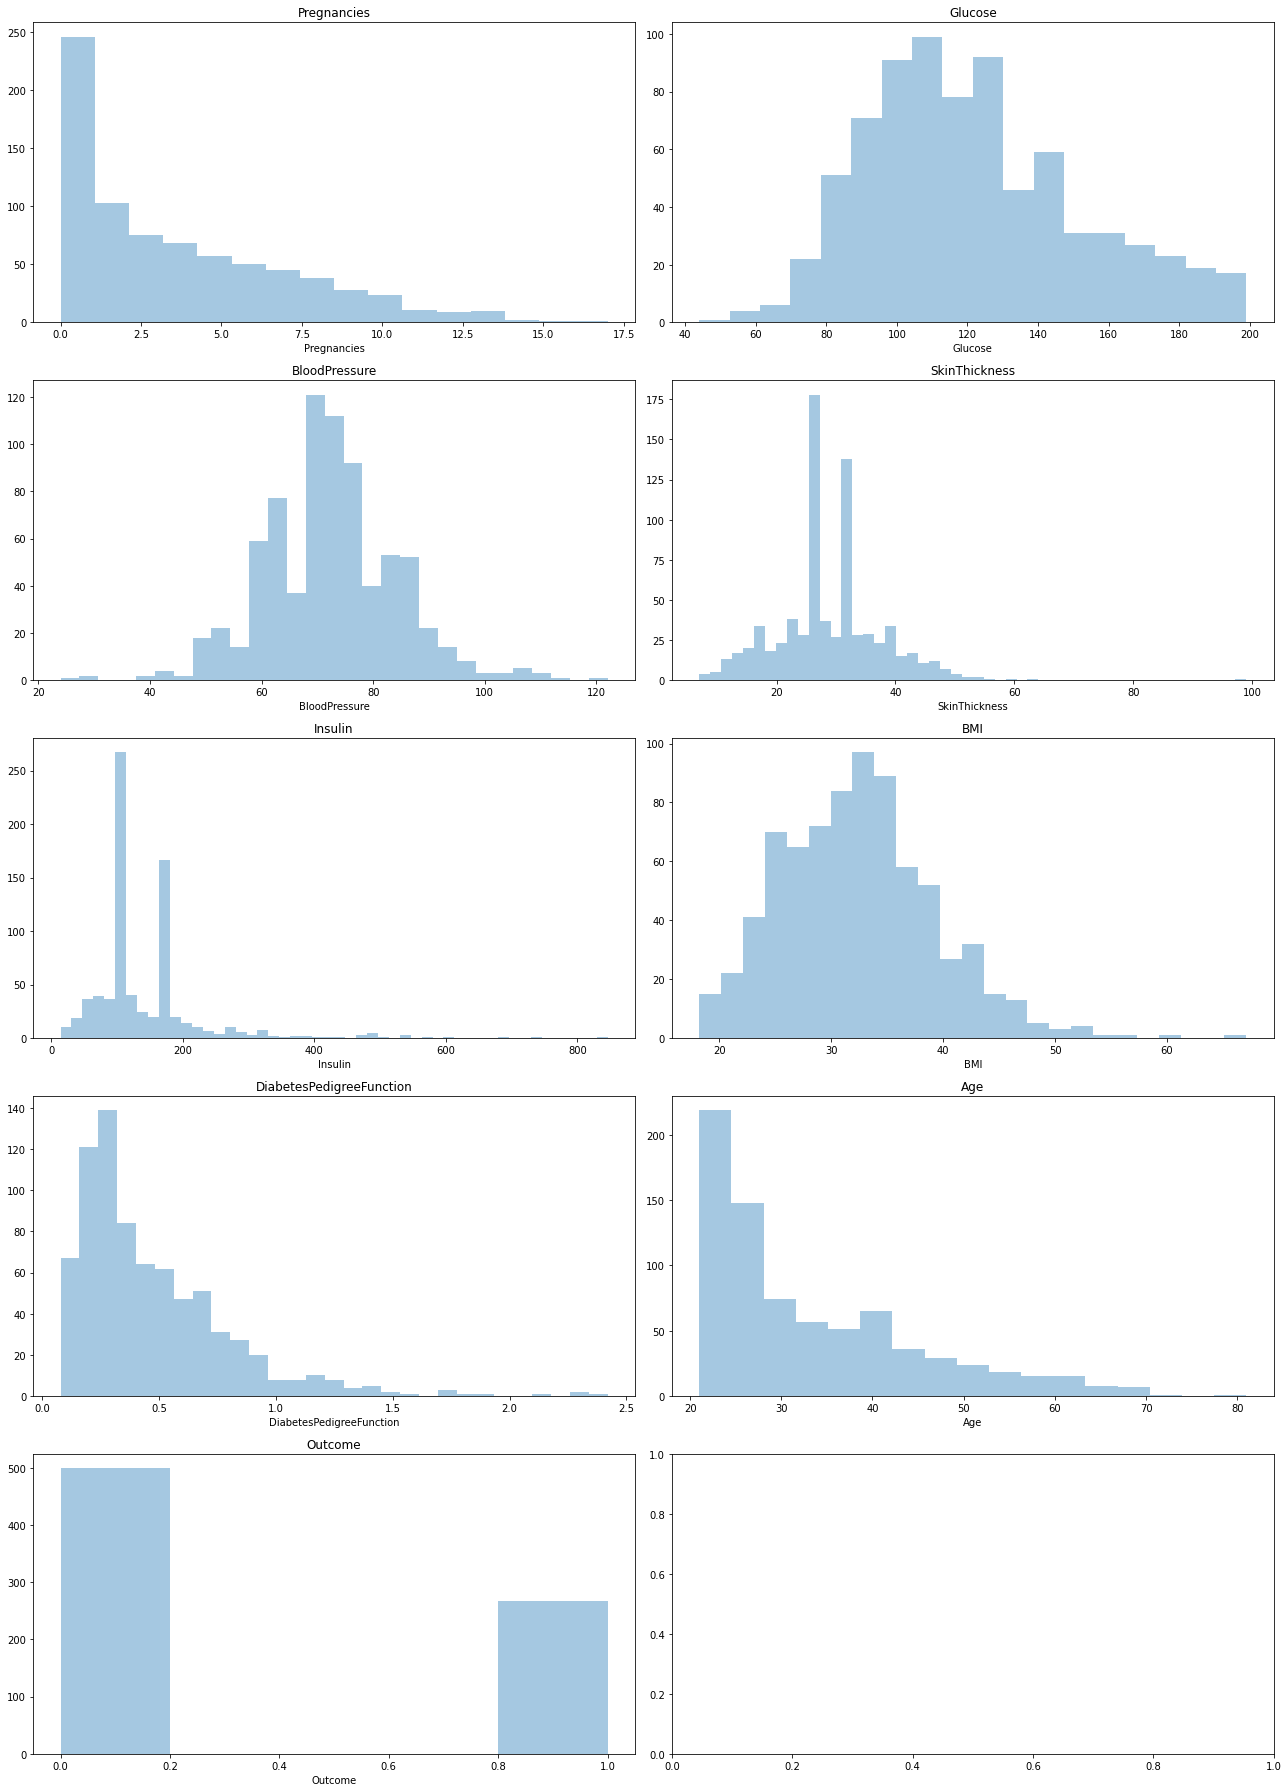

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(18, 25))

for i, subplot in zip(range(9), ax.flatten()):
    
    sns.distplot(df[column_list[i]], hist=True, ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()
    
plt.show()

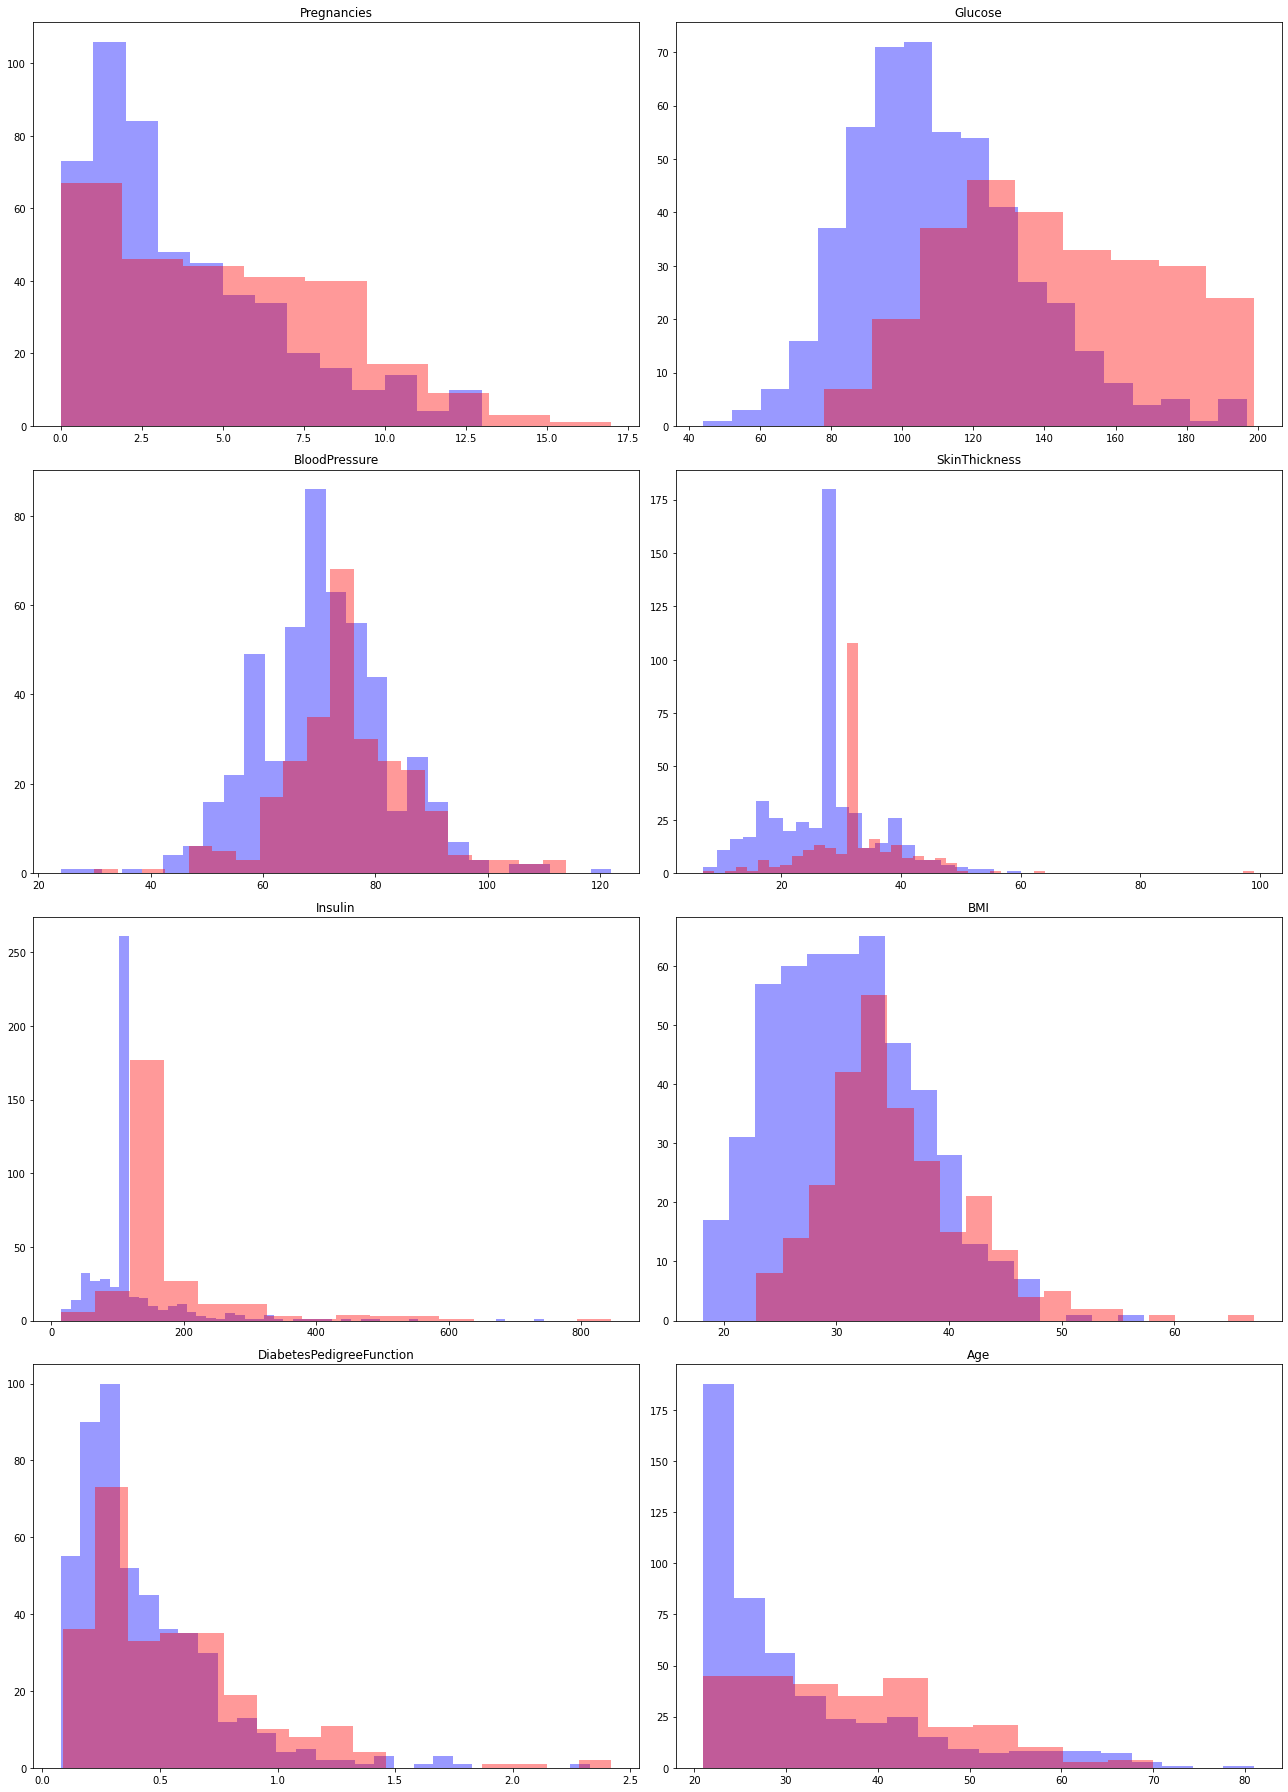

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(18, 25))

target_0 = df.loc[df['Outcome'] == 0]
target_1 = df.loc[df['Outcome'] == 1]

for i, subplot in zip(range(8), ax.flatten()):
    
    sns.distplot(target_0[[column_list[i]]], hist=True, color = 'blue', ax=subplot, norm_hist = False, kde = False)
    sns.distplot(target_1[[column_list[i]]], hist=True, color = 'red', ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe98d754450>,
      dtype=object)

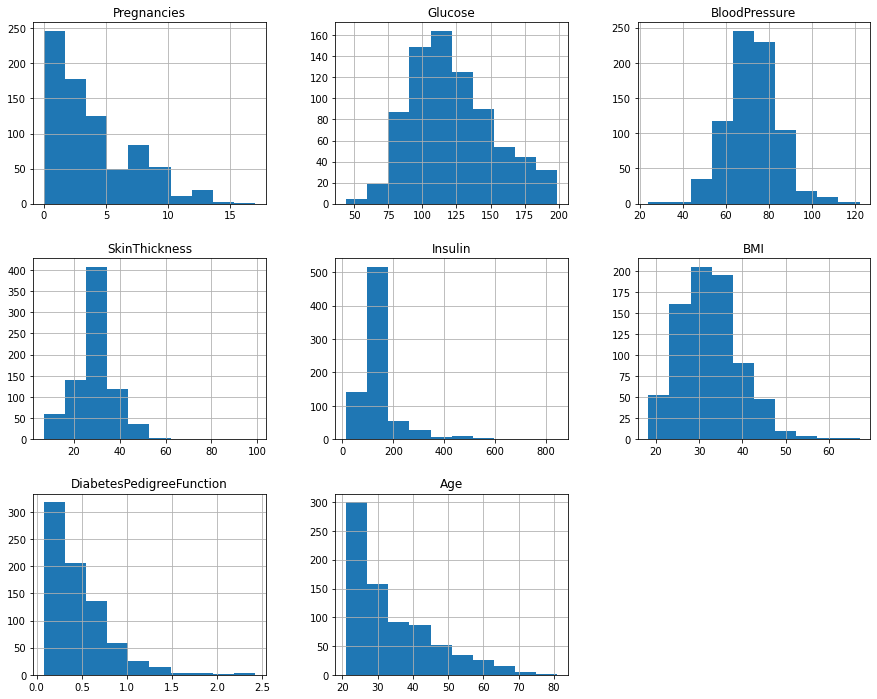

In [ ]:
#visualizing numeric data

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].hist(figsize=(15, 12), bins=10)

In [ ]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0


Text(0, 0.5, 'No of Pregnancies')

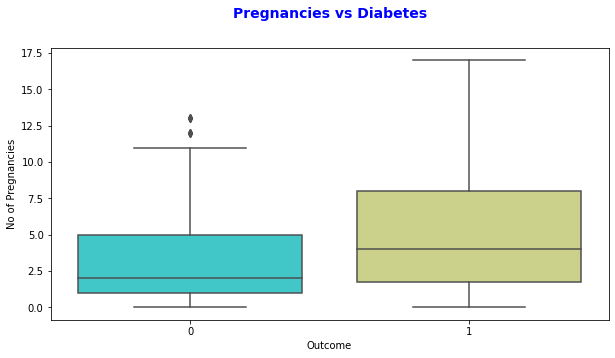

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Pregnancies",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Pregnancies vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('No of Pregnancies', fontsize = 10)

Text(0, 0.5, 'Glucose Amount')

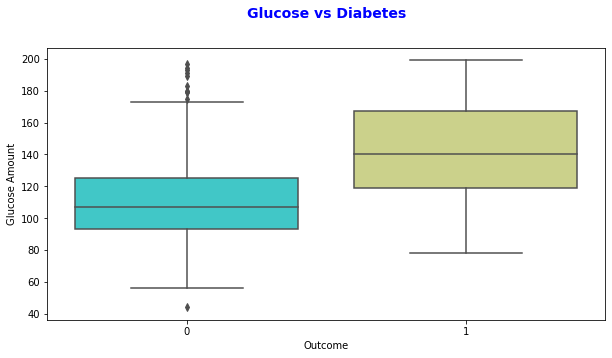

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Glucose",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Glucose vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Glucose Amount', fontsize = 10)

Text(0, 0.5, 'BloodPressure')

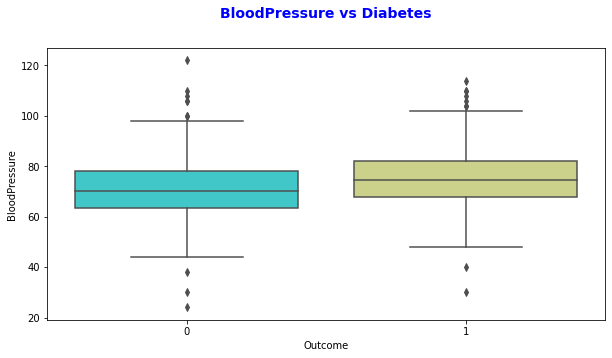

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="BloodPressure",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='BloodPressure vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('BloodPressure', fontsize = 10)

Text(0, 0.5, 'SkinThickness')

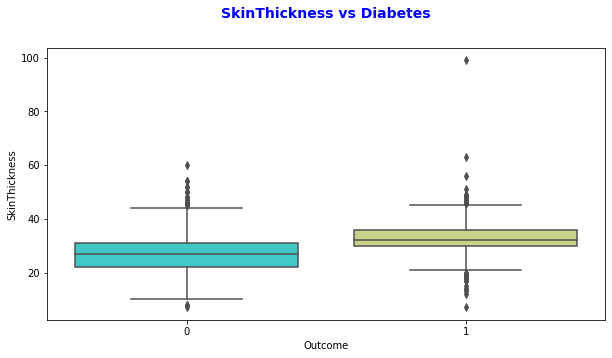

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="SkinThickness",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='SkinThickness vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('SkinThickness', fontsize = 10)

Text(0, 0.5, 'Insulin')

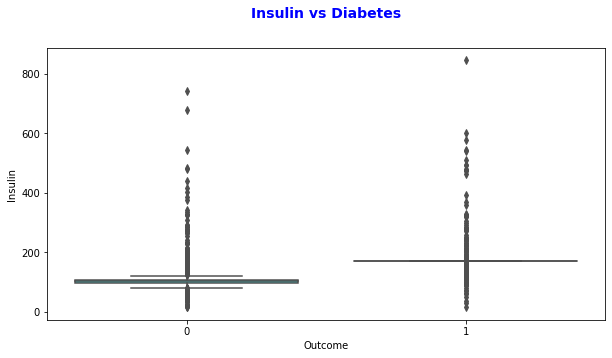

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Insulin",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Insulin vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Insulin', fontsize = 10)

Text(0, 0.5, 'BMI')

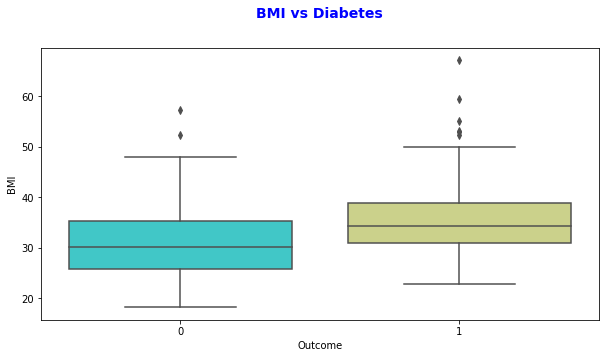

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="BMI",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='BMI vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('BMI', fontsize = 10)

Text(0, 0.5, 'DiabetesPedigreeFunction')

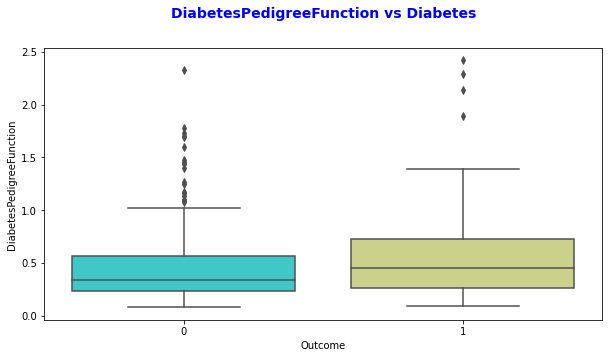

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='DiabetesPedigreeFunction vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('DiabetesPedigreeFunction', fontsize = 10)

Text(0, 0.5, 'Age')

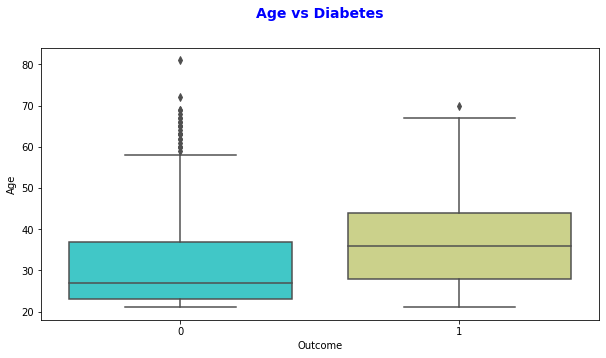

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Age",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Age vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Age', fontsize = 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix, accuracy_score

USING PCA ANALYSIS FOR PLOTTING

In [ ]:
pca_x = df.copy()
pca_x = pca_x.drop(columns = "Outcome")

In [ ]:
scaler = StandardScaler()
pca_x = pd.DataFrame(scaler.fit_transform(pca_x))

In [ ]:
pca_x

,0,1,2,3,4,5,6,7
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [ ]:

pca_df = pd.DataFrame(df['Outcome'])

In [ ]:
#visualizing using PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_x)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 

In [ ]:

pca_df.columns = ['Diabetic outcome','pca-one', 'pca-two']
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29817668 0.18752573]


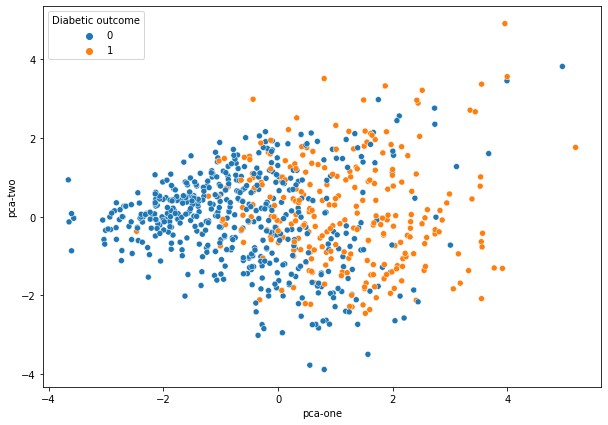

In [ ]:

plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pca-one", y="pca-two",hue='Diabetic outcome', data=pca_df)

In [ ]:
df_tsne = df.copy()

In [ ]:
df_tsne.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
y = df_tsne['Outcome']
df_tsne = df_tsne.drop(columns = 'Outcome')

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(df_tsne)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


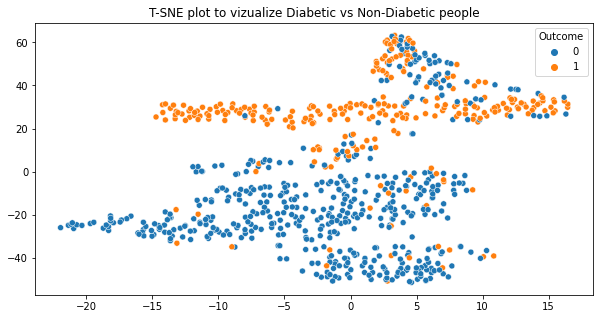

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('T-SNE plot to vizualize Diabetic vs Non-Diabetic people')
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y)
plt.show()

 the diabetic people and non-diabetic people are mostly clustered together on the t-SNE plot.

In [ ]:
data = df.copy()

In [ ]:
Y = data.Outcome
X = data.drop("Outcome", axis = 1)

In [ ]:

columns = X.columns

Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

Using Normalization : rescales the values into a range of [0,1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train)

#save
import pickle
pickle.dump(std, open('std.pkl','wb'))


X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.531978,-0.706880,-0.186385,2.489469,-0.956673,1.157236,0.631014,-0.693698
1,0.057083,-0.113681,-0.186385,-0.237913,-0.454062,1.742852,1.334750,-0.608986
2,1.824269,-0.673925,0.318498,2.053088,0.402033,0.044565,-0.937667,2.525347
3,-0.826509,-0.838703,-0.691267,-0.237913,-0.625281,0.088486,-0.571848,-1.032545
4,1.235207,-0.871658,-0.018090,-0.237913,-0.454062,0.615541,0.035783,2.017077


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.121040,-0.245503,0.655087,0.525754,1.561903,1.698931,-0.950067,-0.524274
1,-0.531978,-0.311414,1.159969,1.398516,0.181105,0.849787,-0.705155,-0.439563
2,0.057083,0.018142,-0.354679,-0.237913,-0.454062,0.352014,-0.246331,-0.354851
3,-0.826509,-0.805747,-0.186385,-1.547056,-0.454062,-2.107575,-1.012071,-1.032545
4,1.824269,1.336364,0.991675,-0.237913,-0.454062,-0.716736,-0.903565,1.762942
...,...,...,...,...,...,...,...,...
149,0.351614,0.347697,0.655087,-0.237913,-0.454062,-0.848500,-0.891164,3.033618
150,0.940676,-0.080725,-0.186385,-0.237913,-0.454062,-1.082746,-0.819861,0.322843
151,0.351614,-1.102347,-0.522973,-0.892485,-1.332250,-1.199869,-0.407540,-0.270139
152,-0.237448,0.215875,-0.018090,-0.456104,0.512497,-0.028637,0.234193,-0.524274


In [ ]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.83


Using Standardization :  rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.361290,0.469388,0.489130,0.051683,0.456033,0.255764,0.066667
1,0.235294,0.477419,0.469388,0.217391,0.106370,0.537832,0.352690,0.083333
2,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
3,0.058824,0.335484,0.408163,0.217391,0.087740,0.306748,0.090094,0.000000
4,0.470588,0.329032,0.489796,0.217391,0.106370,0.380368,0.173783,0.600000


In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.451613,0.571429,0.293478,0.325721,0.531697,0.038002,0.100000
1,0.117647,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
2,0.235294,0.503226,0.448980,0.217391,0.106370,0.343558,0.134927,0.133333
3,0.058824,0.341935,0.469388,0.086957,0.106370,0.000000,0.029462,0.000000
4,0.588235,0.761290,0.612245,0.217391,0.106370,0.194274,0.044406,0.550000


In [ ]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with normalized features: 0.82


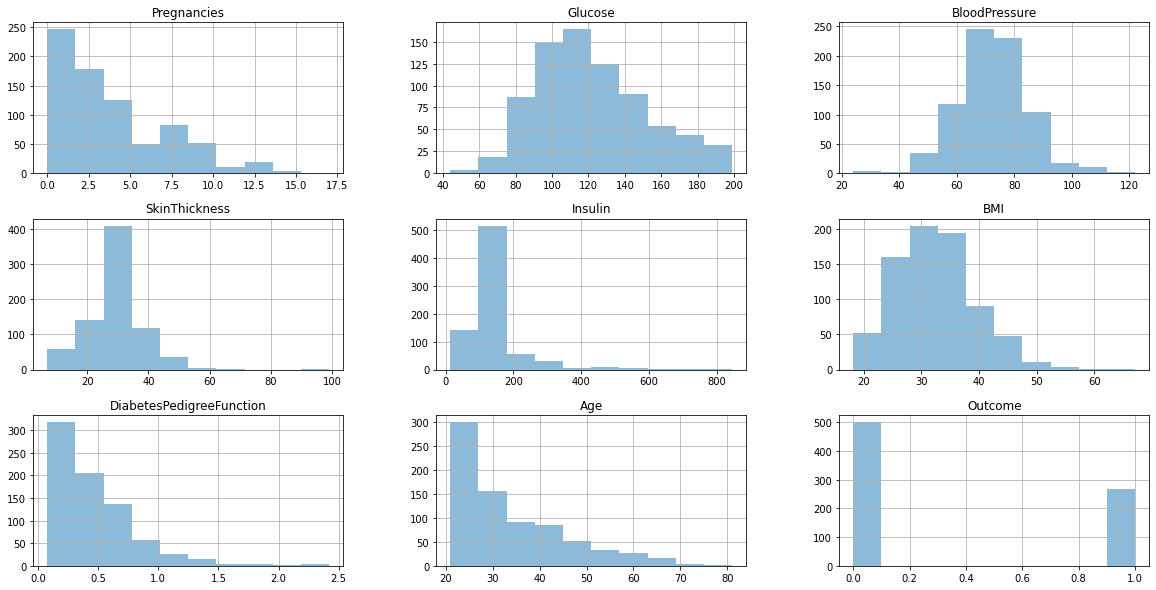

In [ ]:
# Plotting the histograms of each variable
from matplotlib import pyplot
data.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

In [ ]:
X_train_std = X_train[['BMI','BloodPressure', 'Glucose']]
X_test_std = X_test[['BMI','BloodPressure', 'Glucose']]

In [ ]:
X_train_norm = X_train[['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']]
X_test_norm = X_test[['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']]

In [ ]:

colums_std = ['BMI','BloodPressure', 'Glucose']
columns_norm = ['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train_std)
X_train_std = std.transform(X_train_std)
X_test_std = std.transform(X_test_std)
X_train_std = pd.DataFrame(X_train_std, columns = colums_std)
X_test_std = pd.DataFrame(X_test_std, columns = colums_std)
X_train_std.head()

,BMI,BloodPressure,Glucose
0,1.157236,-0.186385,-0.706880
1,1.742852,-0.186385,-0.113681
2,0.044565,0.318498,-0.673925
3,0.088486,-0.691267,-0.838703
4,0.615541,-0.018090,-0.871658


In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train_norm)
X_train_norm = norm.transform(X_train_norm)
X_test_norm = norm.transform(X_test_norm)
X_train_norm = pd.DataFrame(X_train_norm, columns = columns_norm)
X_test_norm = pd.DataFrame(X_test_norm, columns = columns_norm)
X_train_norm.head()

,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,0.066667,0.255764,0.051683,0.117647,0.489130
1,0.083333,0.352690,0.106370,0.235294,0.217391
2,0.700000,0.039710,0.199519,0.588235,0.445652
3,0.000000,0.090094,0.087740,0.058824,0.217391
4,0.600000,0.173783,0.106370,0.470588,0.217391


In [ ]:
X_train = pd.concat([X_train_std, X_train_norm], axis=1)
X_test = pd.concat([X_test_std, X_test_norm], axis=1)

In [ ]:
X_train.head(2)

,BMI,BloodPressure,Glucose,Age,DiabetesPedigreeFunction,Insulin,Pregnancies,SkinThickness
0,1.157236,-0.186385,-0.706880,0.066667,0.255764,0.051683,0.117647,0.489130
1,1.742852,-0.186385,-0.113681,0.083333,0.352690,0.106370,0.235294,0.217391


In [ ]:
y_test

162    0
620    0
233    0
438    0
660    0
      ..
123    0
222    0
52     0
541    1
439    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with normalized features: 0.82


K NEAREST NEIGHBOURS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_scores.append(neigh.score(X_train,y_train))
    test_scores.append(neigh.score(X_test,y_test))

In [ ]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 81.43322475570032 for k = 5


In [ ]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))
# K=9 has generalized well for our data.

Max test_scores is 82.46753246753246 for k = 9


SVM

In [ ]:
#Support Vector Machines
from sklearn import svm
svm_model = svm.SVC(probability=True).fit(X_train, y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, y_test)
# Almost 89% Accuracy

0.8116883116883117

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    #tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),

    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()

In [ ]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_name = 'Weights\Weights-{epoch:03d}--{val_accuracy:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = False, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:

# Keeping EPOCHs high as dataset is small.
EPOCHS = 1000
neural_pred = neural_model.fit(X_train, y_train,epochs=EPOCHS, validation_split=0.15, verbose=2, callbacks = callbacks_list )

Epoch 1/1000

Epoch 1: saving model to Weights\Weights-001--0.70968.hdf5
17/17 - 2s - loss: 0.6962 - accuracy: 0.4914 - val_loss: 0.6800 - val_accuracy: 0.7097 - 2s/epoch - 121ms/step
Epoch 2/1000

Epoch 2: saving model to Weights\Weights-002--0.70968.hdf5
17/17 - 0s - loss: 0.6800 - accuracy: 0.6411 - val_loss: 0.6641 - val_accuracy: 0.7097 - 87ms/epoch - 5ms/step
Epoch 3/1000

Epoch 3: saving model to Weights\Weights-003--0.70968.hdf5
17/17 - 0s - loss: 0.6643 - accuracy: 0.6411 - val_loss: 0.6318 - val_accuracy: 0.7097 - 103ms/epoch - 6ms/step
Epoch 4/1000

Epoch 4: saving model to Weights\Weights-004--0.70968.hdf5
17/17 - 0s - loss: 0.6242 - accuracy: 0.6411 - val_loss: 0.5672 - val_accuracy: 0.7097 - 104ms/epoch - 6ms/step
Epoch 5/1000

Epoch 5: saving model to Weights\Weights-005--0.70968.hdf5
17/17 - 0s - loss: 0.5764 - accuracy: 0.6411 - val_loss: 0.5196 - val_accuracy: 0.7097 - 100ms/epoch - 6ms/step
Epoch 6/1000

Epoch 6: saving model to Weights\Weights-006--0.70968.hdf5
17/1

In [ ]:
callbacks_list

In [ ]:
# Let's measure final performance
hist = pd.DataFrame(neural_pred.history)
hist['epoch'] = neural_pred.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.191259,0.930902,0.462372,0.795699,995
996,0.190421,0.930902,0.496883,0.784946,996
997,0.189251,0.932822,0.475002,0.795699,997
998,0.188939,0.930902,0.505925,0.817204,998
999,0.187694,0.927063,0.479057,0.795699,999


In [ ]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.696151,0.491363,0.680027,0.709677,0
1,0.680032,0.641075,0.664144,0.709677,1
2,0.664269,0.641075,0.631829,0.709677,2
3,0.624248,0.641075,0.567164,0.709677,3
4,0.576357,0.641075,0.519566,0.709677,4
...,...,...,...,...,...
995,0.191259,0.930902,0.462372,0.795699,995
996,0.190421,0.930902,0.496883,0.784946,996
997,0.189251,0.932822,0.475002,0.795699,997
998,0.188939,0.930902,0.505925,0.817204,998


In [ ]:
hist['val_accuracy']

0      0.709677
1      0.709677
2      0.709677
3      0.709677
4      0.709677
         ...   
995    0.795699
996    0.784946
997    0.795699
998    0.817204
999    0.795699
Name: val_accuracy, Length: 1000, dtype: float64

In [ ]:
hist['val_accuracy'].max()

0.9032257795333862

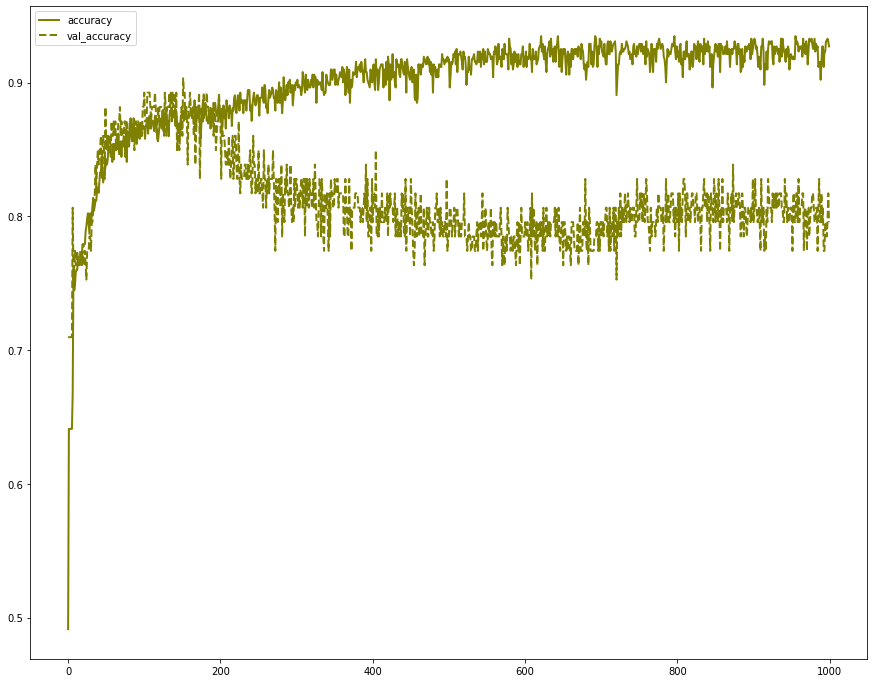

In [ ]:
# multiple line plots
plt.figure(figsize= (15,12))

#plt.plot( 'epoch', 'loss', data=hist, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'epoch', 'accuracy', data=hist, marker='', color='olive', linewidth=2)
plt.plot( 'epoch', 'val_accuracy', data=hist, marker='', color='olive', linewidth=2, linestyle='dashed', label="val_accuracy")
# show legend
plt.legend()

# show graph
plt.show()

In [ ]:
neural_test=neural_model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [ ]:
neural_test_converted=[]
for i in neural_test:
    if i>0.5:
        neural_test_converted.append(1)
    else:
        neural_test_converted.append(0)

In [ ]:

cmp_list=accuracy_score(neural_test_converted,y_test)

In [ ]:
cmp_list

0.8441558441558441

In [ ]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))